**<p align = 'center'>   😃  Use ML & DL Models On cleaned DataSet**

# **Objective**:

- Use TF-IDF with different feature limits to compare performance.
- Train and evaluate a Logistic Regression model & Complement Naive Bayes.
- Train and evaluate sequence models (GRU and LSTM) to handle long-term dependencies in text.
- Handle class imbalance using class weights.
- Save the trained models for future deployment.

##Import Necessary Libraries

In [1]:
pip install livelossplot

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
import joblib

In [3]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import Model, Input
from keras.layers import LSTM, Embedding, Dense
from keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

##Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_cleaned = pd.read_csv('/content/drive/MyDrive/dialects_database_cleaned.csv')

In [6]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',500)

In [10]:
df_cleaned

,id,text,dialect
0,1009754958479151232,قلل ادب نفق اخت او قرب عكس تقل علي نشط حقق رأة ردة فعل,LY
1,1009794751548313600,ليب متقلبينبس نسب ليا انا ميليشياوي زمن وتة,LY
2,1019989115490787200,انه شاب ليب لبن لحظ انه بنت يحس كأن عرف زمن تزج وحد نهن ومم ولاثلاثة قلب رومانسية عيط شيط هزب اند,LY
3,1035479791758135168,ران عقل خلف اول انس يلي حاج اهل يخف نهم علش يكون حرم انس قلل ادب اصل شن ذنب يلي معندهش اب ام خوت خوت يعن يتم متستحقش تزج ثلث ليش بنت لزم ادر الف رجل متستحقش درل الف عبد,LY
4,1035481122921164800,شكل عقد علش رجل حبه ازج بنت يتم بنت معندهش خوت هدي عصب وفك ماع,LY
...,...,...,...
147720,982775354405376000,ناس دي نفخ قرب قدد درج كده بلد دي كيز ديل رحو افي حيه شرف بلد دي لان سبب فسد صئب,SD
147721,980728852224860160,انت عيش وين بره سود شنو ماشايف حصل دا,SD
147722,975502734668500992,مااحرم يسي حرف لعب رضو درد فخر,SD
147723,980207908641263616,يخي ديل خلو شيط بلس شي روحو وين ربن ونح يكز يعف ايم عدد خلص,SD


In [8]:
df_cleaned.isnull().sum()

id           0
text       304
dialect      0
dtype: int64

In [11]:
# Remove rows with null values in the 'text' column
df_cleaned = df_cleaned.dropna(subset=['text'])

# Verify that the null values are removed
print(df_cleaned.isnull().sum())

id         0
text       0
dialect    0
dtype: int64


##Data Splitting

In [12]:
x=df_cleaned.drop(['id','dialect'], axis=1)
y=df_cleaned['dialect']

In [13]:
print("shape of x :",x.shape)
print("shape of y  :" ,y.shape)

shape of x : (147421, 1)
shape of y  : (147421,)


In [14]:
x_train ,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.15, random_state=24, shuffle=True,stratify=y)

In [15]:
x_train, x_val , y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42,stratify=y_train)

In [16]:
x_train.isnull().sum()

text    0
dtype: int64

# Tokenizer and Model

## ML Models

In [17]:
# Use a Set to Store Unique Words
unique_words = set()

for text in x_train['text']:
    words = text.split()  # Tokenize
    unique_words.update(words)

# Number of Unique Words
num_unique_words = len(unique_words)
print(f'Number of unique words: {num_unique_words}')

Number of unique words: 60104


**Term Frequency-Inverse Document Frequency (TF-IDF):**
-  TF-IDF assigns weights to terms based on their frequency in individual documents and their inverse frequency across all documents. This technique helps capture the importance of terms in distinguishing between documents.

In [18]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train['text'])
x_val_tfidf = vectorizer.transform(x_val['text'])
x_test_tfidf = vectorizer.transform(x_test['text'])

In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [20]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_tfidf, y_train_encoded)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
# Evaluate on validation set
y_val_pred = model.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.7695


In [22]:
# Evaluate on test set
y_test_pred = model.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7678


In [23]:
precision = precision_score(y_test_encoded, y_test_pred, average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.7735


In [24]:
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.78      0.88      0.83      8628
          LB       0.80      0.76      0.78      4137
          LY       0.71      0.77      0.74      5466
          MA       0.81      0.57      0.67      1727
          SD       0.76      0.48      0.59      2156

    accuracy                           0.77     22114
   macro avg       0.77      0.69      0.72     22114
weighted avg       0.77      0.77      0.76     22114



### use 10000  Unique Words


In [25]:
# TF-IDF Vectorization
vectorizer_ = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer_.fit_transform(x_train['text'])
x_val_tfidf = vectorizer_.transform(x_val['text'])
x_test_tfidf = vectorizer_.transform(x_test['text'])

In [26]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_tfidf, y_train_encoded)


LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Evaluate on validation set
y_val_pred = model.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
val_Precision = precision_score(y_val_encoded, y_val_pred, average='macro')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Precision: {val_Precision:.4f}')

Validation Accuracy: 0.7774
Precision: 0.7890


In [28]:
# Evaluate on test set
y_test_pred = model.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7761


In [29]:
precision = precision_score(y_test_encoded, y_test_pred, average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.7835


In [30]:
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.79      0.89      0.84      8628
          LB       0.81      0.77      0.79      4137
          LY       0.72      0.78      0.75      5466
          MA       0.83      0.58      0.68      1727
          SD       0.77      0.49      0.60      2156

    accuracy                           0.78     22114
   macro avg       0.78      0.70      0.73     22114
weighted avg       0.78      0.78      0.77     22114



Use All Unique Words

In [31]:
# TF-IDF Vectorization
vectorizer_ = TfidfVectorizer(max_features=num_unique_words)
x_train_tfidf = vectorizer_.fit_transform(x_train['text'])
x_val_tfidf = vectorizer_.transform(x_val['text'])
x_test_tfidf = vectorizer_.transform(x_test['text'])

In [32]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_tfidf, y_train_encoded)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
# Evaluate on validation set
y_val_pred = model.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
val_Precision = precision_score(y_val_encoded, y_val_pred, average='macro')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Precision: {val_Precision:.4f}')

Validation Accuracy: 0.7782
Precision: 0.7897


In [34]:
# Evaluate on test set
y_test_pred = model.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7767


In [35]:
precision = precision_score(y_test_encoded, y_test_pred, average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.7861


In [37]:
print("classification_report using LogisticRegression : ")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

classification_report using LogisticRegression : 
              precision    recall  f1-score   support

          EG       0.79      0.89      0.84      8628
          LB       0.81      0.77      0.79      4137
          LY       0.72      0.78      0.75      5466
          MA       0.83      0.58      0.68      1727
          SD       0.78      0.49      0.60      2156

    accuracy                           0.78     22114
   macro avg       0.79      0.70      0.73     22114
weighted avg       0.78      0.78      0.77     22114



### **Complement Naive Bayes**

The Complement Naive Bayes (CNB) classifier addresses imbalanced datasets by adjusting the computation of class probabilities during training. It was specifically designed to work well on imbalanced text classification tasks, where one class may dominate the others in terms of frequency.

In [40]:
clf = ComplementNB()
clf.fit(x_train_tfidf, y_train_encoded)

ComplementNB()

In [43]:
# Evaluate on validation set
y_val_pred = clf.predict(x_val_tfidf)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
val_Precision = precision_score(y_val_encoded, y_val_pred, average='macro')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Precision: {val_Precision:.4f}')

Validation Accuracy: 0.7639
Precision: 0.7690


In [44]:
# Evaluate on test set
y_test_pred = clf.predict(x_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7646


In [45]:
precision = precision_score(y_test_encoded, y_test_pred, average='macro')
print(f'Test Precision: {precision:.4f}')

Test Precision: 0.7643


In [46]:
print("classification_report using ComplementNB : ")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

classification_report using ComplementNB : 
              precision    recall  f1-score   support

          EG       0.77      0.90      0.83      8628
          LB       0.77      0.79      0.78      4137
          LY       0.76      0.72      0.74      5466
          MA       0.79      0.61      0.69      1727
          SD       0.74      0.39      0.51      2156

    accuracy                           0.76     22114
   macro avg       0.76      0.68      0.71     22114
weighted avg       0.76      0.76      0.76     22114



## **DeepLearning**


## Gated Recurrent Unit (GRU)

The GRU cell replaces the Simple rnn cell, and adds a **gate** to the network, this gates allows the network to choose what to keep from the previous state, and thus can keep track of some memories, and also solves the vanishing gradient problem.

The gates allows to forget certain points of the hidden states.

The simplified version of the equations are as follows

<center><img src='images/gru.png'></center>

Here we say that $C^t = a^t = h^t$ meaning that that output state/hidden state are the same

The parameter $\tilde{C}$ is the candidate to replace vector, which will include the candidate hidden state

$$\tilde{C} = tanh(W_c [C^{t-1}, X^t] + b_c)$$

The gate $\Gamma_u$ is the gate that will tell which to forget of the last state and which to remember.

$$\Gamma_u = \sigma(W_u [C^{t-1}, X^t] + b_u)$$

The parameter $C^t$ includes the final output of the cell

$$C^t = \Gamma_u*\tilde{C} + (1-\Gamma_u)* C^{t-1}$$

So:

- if $\Gamma_u=0$ then $C^t = C^{t-1}$
- if $\Gamma_u=1$ then $C^t = \tilde{C}$

## ♻ Text Vectorization
  * **Token Indexing**: Convert tokens to numerical indices.
  * **Padding**: Ensure all sequences have the same length by padding shorter sequences.

In [ ]:
# Parameters
max_seq_length = 100
embedding_dim = 100

In [ ]:
# Tokenization and Padding
# Tokenizer to convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train["text"])

#  word index
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(f"Total words in the dataset: {total_words}")



Total words in the dataset: 63118


In [ ]:
# Get word frequencies
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Determine a suitable max_vocab_size based on a desired percentile or cutoff
cutoff_percentile = 95  # Keep top 95% of the words
cutoff_index = int(total_words * (cutoff_percentile / 100))
max_vocab_size = len([word for word, count in sorted_word_counts[:cutoff_index]])

# Refit tokenizer with limited vocab size
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train["text"])


In [ ]:
# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(x_train['text'])
X_val_seq = tokenizer.texts_to_sequences(x_val['text'])
X_test_seq = tokenizer.texts_to_sequences(x_test['text'])

In [ ]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post')

In [ ]:
 #Check the shape of the padded sequences to confirm they match with the labels
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_val_pad shape: {X_val_pad.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")

X_train_pad shape: (113009, 100)
X_val_pad shape: (12557, 100)
X_test_pad shape: (22159, 100)


In [ ]:
np.unique (y_train)

array(['EG', 'LB', 'LY', 'MA', 'SD'], dtype=object)

In [ ]:

# Get the number of unique classes
num_classes = len(np.unique(y_train))

# Convert labels to categorical one-hot encoding
y_train_cat = to_categorical (y_train_encoded, num_classes)
y_val_cat = to_categorical(y_val_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

In [ ]:
print (y_train_cat.shape)

(113009, 5)


### Implementing GRU in Tensorflow

In [ ]:
gru_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim= max_vocab_size, output_dim=embedding_dim ,input_length=max_seq_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
gru_bi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          5996200   
                                                                 
 bidirectional_3 (Bidirecti  (None, 100, 256)          176640    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 100, 256)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 100, 128)          123648    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)              

In [ ]:
gru_bi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Handling Imbalnced Classes

In [ ]:
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y= y_train_encoded
)

# Convert the class weights to a dictionary format required by Keras
class_weights = {i: weight for i, weight in enumerate(class_weights)}
class_weights

{0: 0.5126054613081739,
 1: 1.0698064088606996,
 2: 0.8094910640736364,
 3: 2.5605301914580263,
 4: 2.0468936786813985}

**Model Training 🏃**

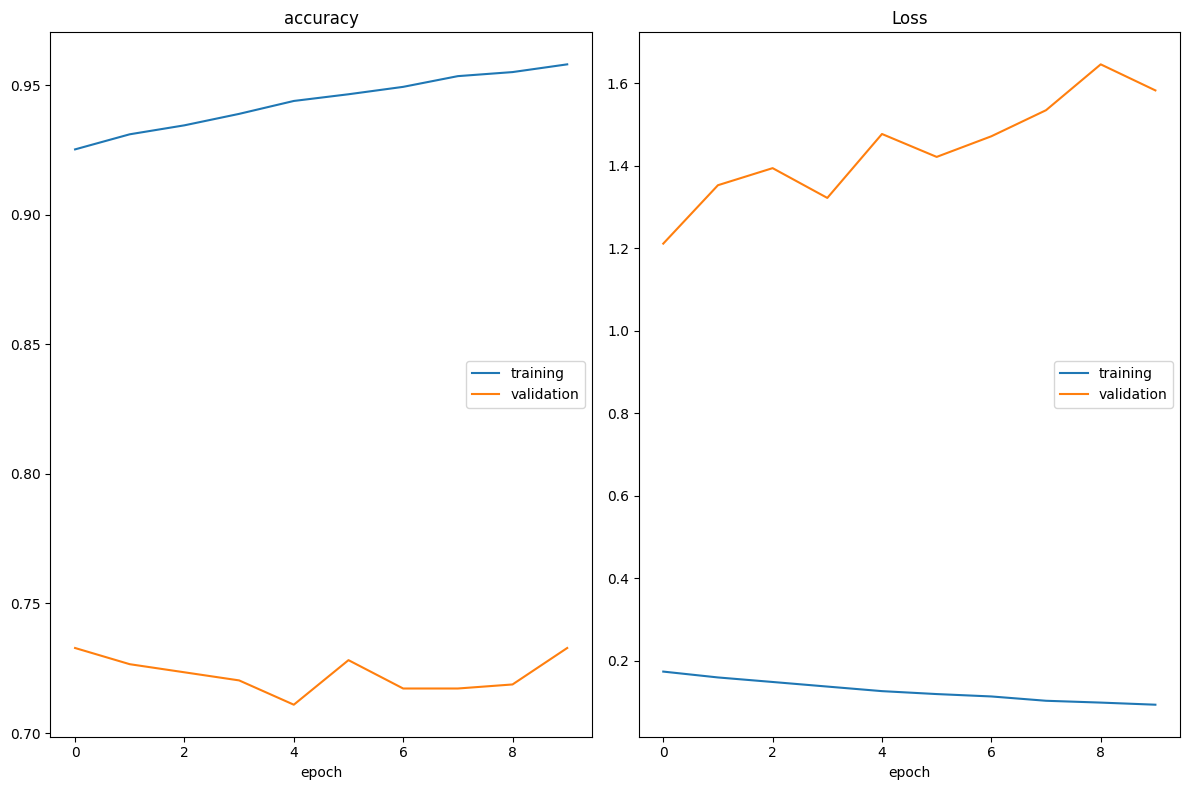

accuracy
	training         	 (min:    0.925, max:    0.958, cur:    0.958)
	validation       	 (min:    0.711, max:    0.733, cur:    0.733)
Loss
	training         	 (min:    0.094, max:    0.174, cur:    0.094)
	validation       	 (min:    1.211, max:    1.646, cur:    1.582)

Epoch 10: val_loss did not improve from 1.21115
1766/1766 [==============================] - 53s 30ms/step - loss: 0.0939 - accuracy: 0.9580 - val_loss: 1.5824 - val_accuracy: 0.7328
CPU times: user 9min 37s, sys: 26.6 s, total: 10min 3s
Wall time: 10min 22s


In [ ]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history_GRU = gru_bi.fit(X_train_pad, y_train_cat, epochs= 10, batch_size= 64,
                    validation_data=(X_val_pad, y_val_cat),
                    validation_steps=10,
                    class_weight=class_weights,
                    callbacks=callbacks)

🔭 **Model Evaluation**

In [ ]:
test_loss, test_acc = gru_bi.evaluate(X_test_pad, y_test_cat)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

693/693 [==============================] - 8s 11ms/step - loss: 1.4914 - accuracy: 0.7221
Test Loss: 1.4913619756698608
Test Accuracy: 0.7220993638038635


In [ ]:
y_test_pred_gru_bi = gru_bi.predict(X_test_pad)

693/693 [==============================] - 8s 10ms/step


In [ ]:
precision = precision_score(y_test_encoded, np.argmax(y_test_pred_gru_bi ,axis=1) , average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.6660


In [ ]:
print(classification_report(y_test_encoded,  np.argmax(y_test_pred_gru_bi ,axis=1) , target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.84      0.76      0.80      8645
          LB       0.71      0.78      0.74      4143
          LY       0.73      0.70      0.71      5475
          MA       0.56      0.64      0.60      1731
          SD       0.49      0.57      0.53      2165

    accuracy                           0.72     22159
   macro avg       0.67      0.69      0.68     22159
weighted avg       0.73      0.72      0.73     22159



In [ ]:
gru_bi.save('gru_arabic_dialect_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



## Long Short Term Memory (LSTM)

The lstm offers a long term memory component beside the short term one, and thus enables your model to remember things that he have seen way far in the past, let's go through the idea of the LSTM.


First the candidate new memory is calculated via the following equation

$$\tilde{C} = tanh(W_c [a^{t-1}, x^t] + b_c) $$

Here we simply take the last activation output (or the short term memory) and calculate what is the candidate of it to be remembered.

Then we have three gates here, update, forget and output, let's examine their equations.

> update gate
$$ \Gamma_u = \sigma(W_u [a^{t-1}, x^t] + b_u)$$

---

> forget gate
$$\Gamma_f = \sigma(W_f [a^{t-1}, x^t] + b_f)$$

---

> output gate
$$\Gamma_o = \sigma(W_o [a^{t-1}, x^t] + b_o)$$

---

So the three gates learn to remember, forget and update which parts of the hidden state, thus enable our model to work with relatively long sequences.

Now to the outputs of our cell

> the long term memory
$$C^t = \Gamma_u*\tilde{C} + \Gamma_f*C^{t-1}$$

So basically update these new values that i have just learned $\Gamma_u*\tilde{C}$ ,and keep from the last memory what the forget gate tells you $\Gamma_f*C^{t-1}$

> the short term memory
$$a^t = \Gamma_o*tanh(C^t)$$

just an activation function applied to the short memory learned in this step, and of course based only on the output of the $\Gamma_o$ gate.

> the output for this cell (aka prediction)
$$y^t = softmax(w_y.a^t + b_y)$$

And these together allows the LSTM to work with the large sequences without forgetting what was in the very first of the sentence, thus it can work with long sequences.

### Implementing LSTM in Tensorflow

In [ ]:
lstm_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim= max_vocab_size, output_dim=embedding_dim ,input_length=max_seq_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (128, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (64, return_sequences=True)),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM (64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
lstm_bi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Model Training 🏃**

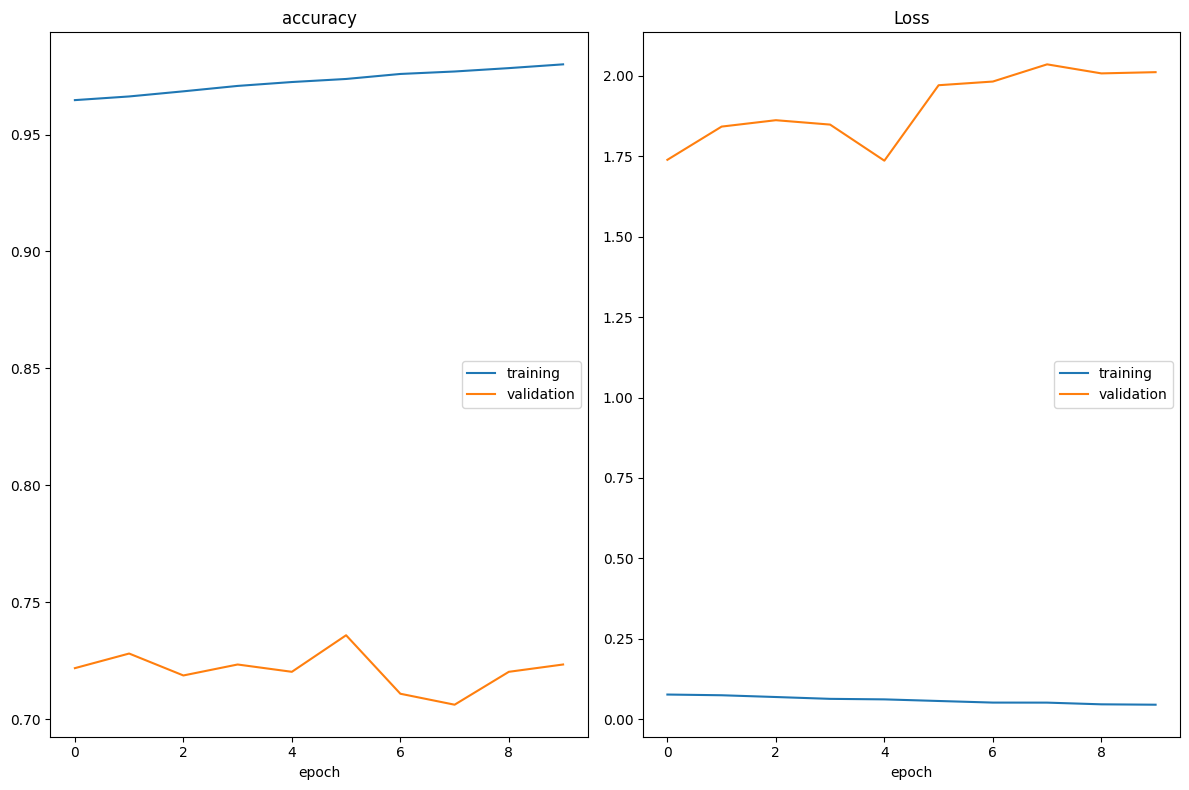

accuracy
	training         	 (min:    0.965, max:    0.980, cur:    0.980)
	validation       	 (min:    0.706, max:    0.736, cur:    0.723)
Loss
	training         	 (min:    0.045, max:    0.077, cur:    0.045)
	validation       	 (min:    1.737, max:    2.036, cur:    2.012)

Epoch 10: val_loss did not improve from 1.73663
1766/1766 [==============================] - 55s 31ms/step - loss: 0.0451 - accuracy: 0.9800 - val_loss: 2.0118 - val_accuracy: 0.7234
CPU times: user 9min 53s, sys: 31.4 s, total: 10min 25s
Wall time: 9min 22s


In [ ]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history_lstm = lstm_bi.fit(X_train_pad, y_train_cat, epochs= 10, batch_size= 64,
                    validation_data=(X_val_pad, y_val_cat),
                    validation_steps=10,
                    class_weight=class_weights,
                    callbacks=callbacks)

🔭 **Model Evaluation**

In [ ]:
test_loss_lstm, test_acc_lstm = lstm_bi.evaluate(X_test_pad, y_test_cat)

print('Test Loss: {}'.format(test_loss_lstm))
print('Test Accuracy: {}'.format(test_acc_lstm))

693/693 [==============================] - 8s 11ms/step - loss: 1.9125 - accuracy: 0.7162
Test Loss: 1.9124971628189087
Test Accuracy: 0.7161875367164612


In [ ]:
y_test_pred_lstm = lstm_bi.predict(X_test_pad)

693/693 [==============================] - 7s 10ms/step


In [ ]:
precision = precision_score(y_test_encoded, np.argmax(y_test_pred_lstm ,axis=1) , average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.6617


In [ ]:
print(classification_report(y_test_encoded,  np.argmax(y_test_pred_lstm ,axis=1) , target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          EG       0.83      0.76      0.79      8645
          LB       0.72      0.76      0.74      4143
          LY       0.71      0.71      0.71      5475
          MA       0.57      0.64      0.60      1731
          SD       0.48      0.56      0.52      2165

    accuracy                           0.72     22159
   macro avg       0.66      0.68      0.67     22159
weighted avg       0.73      0.72      0.72     22159



In [ ]:
lstm_bi.save('LSTM_arabic_dialect_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## The Best model is LogisticRegression  with F1_Score : 0.73 %  so i will use it in deployment

## Make pipeline on LogisticRegression  and save it

In [49]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

In [50]:
pipeline.fit(x_train['text'], y_train_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [51]:
# Evaluate on test set
y_test_pred = pipeline.predict(x_test['text'])
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7767


In [52]:
precision = precision_score(y_test_encoded, y_test_pred, average='macro')
print(f'Precision: {precision:.4f}')

Precision: 0.7861


In [53]:
print("classification_report using LogisticRegression : ")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))

classification_report using LogisticRegression : 
              precision    recall  f1-score   support

          EG       0.79      0.89      0.84      8628
          LB       0.81      0.77      0.79      4137
          LY       0.72      0.78      0.75      5466
          MA       0.83      0.58      0.68      1727
          SD       0.78      0.49      0.60      2156

    accuracy                           0.78     22114
   macro avg       0.79      0.70      0.73     22114
weighted avg       0.78      0.78      0.77     22114



In [54]:
# Save the pipeline
joblib.dump(pipeline, 'text_classification_pipeline.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

**<p align = 'center'> Thank You 😃**